##Setup

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yaml, time, sys, os

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  
sns.set_style("darkgrid")

DATASET = "MINST"

COLAB = 'google.colab' in sys.modules
if COLAB:
    ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
else:
    ROOT = "./"

DEBUG = True
SEED = 6

In [2]:
if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(d): os.makedirs(d)
  if not os.path.isdir(ROOT): os.makedirs(ROOT)

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

Mounted at /content/gdrive


In [13]:
from sklearn.model_selection import train_test_split

##Datasets

In [ ]:
!pip install openml

In [6]:
from openml.datasets import list_datasets, get_dataset
df_openml = list_datasets(output_format="dataframe")

In [7]:
df_openml.loc[df_openml.name.str.contains("mnist")]

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
554,554,mnist_784,1,2,active,ARFF,7877.0,10.0,6313.0,10.0,785.0,70000.0,0.0,0.0,784.0,1.0
41065,41065,mnist_rotation,1,3002,active,ARFF,NaN,NaN,NaN,0.0,785.0,62000.0,0.0,0.0,785.0,0.0


In [18]:
did = 554

name = df_openml.loc[(df_openml.did==did), "name"].values[0]

print(f"Fetching database name:{name} id:{did}")

dataset = get_dataset(did)

Fetching database name:mnist_784 id:554


In [19]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)

In [20]:
target = dataset.default_target_attribute
df = pd.DataFrame(data=X, columns=attribute_names)
df[target] = y
print(df.shape)
df.head()

(70000, 785)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pix

##Preprocessing

In [21]:
print(df.shape)
df.fillna(0, inplace=True)
print(df.shape)
X, y = df[attribute_names].values, df[target].values

(70000, 785)
(70000, 785)


In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=SEED)

X_train.shape, X_val.shape, X_test.shape

((42000, 784), (14000, 784), (14000, 784))

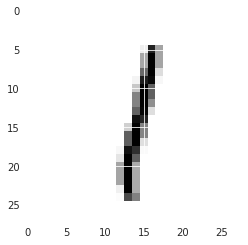

In [23]:
if name=='mnist_784':
    plt.imshow(X_train[0].reshape(28,28), cmap='Greys')
    plt.show()
else:
    display(X_train[0])

##AdaBoost

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(
    base_estimator=base_estimator, 
    n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=SEED)

ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=6)

In [27]:
ada_clf.score(X_train, y_train)

0.7821190476190476

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ada_clf.predict(X_test))

0.7742857142857142

In [29]:
# create a list of all possible depth values
depths = [1,2,3,4,5,6]

models = []
train_accuracy = []
val_accuracy = []

# create a list of models 
for depth in depths:
    base_estimator = DecisionTreeClassifier(max_depth=depth)
    model = AdaBoostClassifier(
        base_estimator=base_estimator, 
        n_estimators=20, algorithm="SAMME.R", learning_rate=0.5, random_state=SEED)
    model.fit(X_train, y_train)
    models.append(model)

    # evaluate model performance
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    train_accuracy.append(train_score)
    val_accuracy.append(val_score)
    print('Depth: {} Train Accuracy: {} Test Accuracy: {}'.format(depth, train_score, val_score))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Depth: 1 Train Accuracy: 0.7059761904761904 Test Accuracy: 0.7048571428571428


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Depth: 2 Train Accuracy: 0.8216190476190476 Test Accuracy: 0.8180714285714286


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Depth: 3 Train Accuracy: 0.856547619047619 Test Accuracy: 0.8517857142857143


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Depth: 4 Train Accuracy: 0.8948095238095238 Test Accuracy: 0.8855


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Depth: 5 Train Accuracy: 0.909547619047619 Test Accuracy: 0.8902142857142857


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Depth: 6 Train Accuracy: 0.9280238095238095 Test Accuracy: 0.8923571428571428


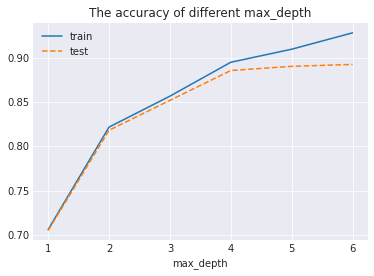

In [30]:
plt.plot(depths, train_accuracy, '-', label='train')
plt.plot(depths, val_accuracy, '--', label='test')
plt.title('The accuracy of different max_depth')
plt.xlabel("max_depth")
plt.xticks(depths)
plt.legend()
plt.show()

In [31]:
best_model = models[np.argmax(val_accuracy)]
best_model.score(X_test, y_test)

0.8940714285714285

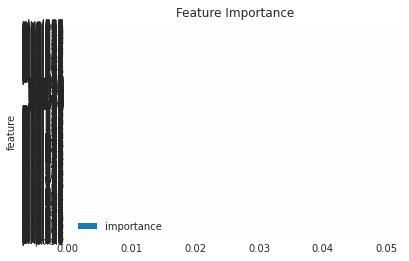

In [32]:
df_tmp = pd.DataFrame({'feature':attribute_names, 'importance':models[0].feature_importances_})

df_tmp.sort_values('importance').plot(kind='barh', x='feature')
plt.title("Feature Importance")
plt.show()

##Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3,
                           random_state=42)

In [34]:
y_pred = gbrt.predict(X_test)
accuracy_score(y_test, y_pred)

0.7102857142857143

In [35]:
gbrt = GradientBoostingClassifier(max_depth=2, subsample = 0.5, tol = 0.01, n_estimators=50, random_state=SEED)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=6,
                           subsample=0.5, tol=0.01)

In [36]:
y_pred = gbrt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8808571428571429

In [37]:
from sklearn.metrics import log_loss

errors = [log_loss(y_val, y_pred)
          for y_pred in gbrt.staged_predict_proba(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=42)

In [38]:
min_error = np.min(errors)
min_error

0.4528952526922886

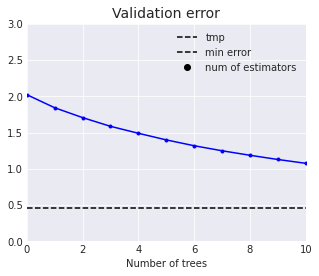

In [39]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--", label="tmp")
plt.plot([0, 10], [min_error, min_error], "k--", label="min error")
plt.plot(bst_n_estimators, min_error, "ko", label="num of estimators")
plt.axis([0, 10, 0, 3])
plt.xlabel("Number of trees")
plt.legend()
plt.title("Validation error", fontsize=14)
plt.show()

##XGBoost

In [40]:
import xgboost

In [41]:
# filter the original data set
criteria = (df[target]==0) | (df[target]==1)
X, y = df.loc[criteria, attribute_names].values, df.loc[criteria,target].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=SEED)

X_train.shape, X_val.shape, X_test.shape

((8868, 784), (2956, 784), (2956, 784))

In [42]:
xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100,
    use_label_encoder=False, objective='binary:logistic', eval_metric="logloss", booster='gbtree')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test Accuracy: 0.9986468200270636


In [43]:
xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100,
    use_label_encoder=False, objective='binary:logistic', eval_metric="logloss", booster='gbtree')
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", val_accuracy)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.59959
[1]	validation_0-logloss:0.52305
[2]	validation_0-logloss:0.45899
[3]	validation_0-logloss:0.40502
[4]	validation_0-logloss:0.35863
[5]	validation_0-logloss:0.31869
[6]	validation_0-logloss:0.28418
[7]	validation_0-logloss:0.25418
[8]	validation_0-logloss:0.22766
[9]	validation_0-logloss:0.20445
[10]	validation_0-logloss:0.18401
[11]	validation_0-logloss:0.16556
[12]	validation_0-logloss:0.14916
[13]	validation_0-logloss:0.13476
[14]	validation_0-logloss:0.12164
[15]	validation_0-logloss:0.11008
[16]	validation_0-logloss:0.09983
[17]	validation_0-logloss:0.09059
[18]	validation_0-logloss:0.08235
[19]	validation_0-logloss:0.07489
[20]	validation_0-logloss:0.06815
[21]	validation_0-logloss:0.06217
[22]	validation_0-logloss:0.05672
[23]	validation_0-logloss:0.05186
[24]	validation_0-logloss:0.04743
[25]	validation_0-logloss:0.04347
[26]	validation_0-logloss:0.03993
[27]	validation_0-logloss:0.03662
[28]	validation_0-logloss:0.03369
[29]	validation_0-loglos